In [21]:
#******************************************************
# Name: Jonah Zembower
# Date: 06/14/2024
# This code is to analyze the spreadsheet 
# data collected from baseline measurements 
# both at the beginning and end of the spring semester.
#******************************************************

In [22]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [23]:

# Load the Excel files
file_paths = [
    "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Spring 2024/Spring 2024 Baseline Measurements Beginning of Semester.xlsx",
    "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Spring 2024/Spring 2024 Baseline Measurements Middle of Semester.xlsx",
    "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Spring 2024/Spring 2024 Baseline Measurements End of Semester.xlsx"
]

# Read the Excel files into dataframes
beginning_df = pd.read_excel(file_paths[0])
middle_df = pd.read_excel(file_paths[1])
end_df = pd.read_excel(file_paths[2])

# Display the first few rows of each dataframe to understand their structure
beginning_df.head(), middle_df.head(), end_df.head()


(   Monitor Number                 Subject Height   Age  Weight (lbs)  Fat%  \
 0             1.0           Alec Griswold    6'0  18.0         171.6  12.3   
 1             2.0            Logen Mackey    5'6  18.0         177.4  19.6   
 2             3.0          Jonathan Leary   5'11  19.0         163.8  12.0   
 3             4.0  Alejandro Lazo Pacheco    5'6  19.0         133.0  11.1   
 4             5.0            James Aubery    6'0  19.0         161.4  11.7   
 
    Fat Mass (lbs)  FFM (lbs)  Muscle Mass (lbs)  TBW (lbs)  TBW%  \
 0            21.2      150.4              143.0      104.8  61.1   
 1            34.8      142.6              135.6      102.8  57.9   
 2            19.6      144.2              137.0      101.0  61.7   
 3            14.8      118.2              112.2       86.4  65.0   
 4            18.8      142.6              135.6       98.6  61.1   
 
    Bone Mass (lbs)  BMR (kcal)  Metabolic Age  Visceral Fat rating   BMI  
 0             7.40      2037.0 

# Looking at Basic BIA Metrics

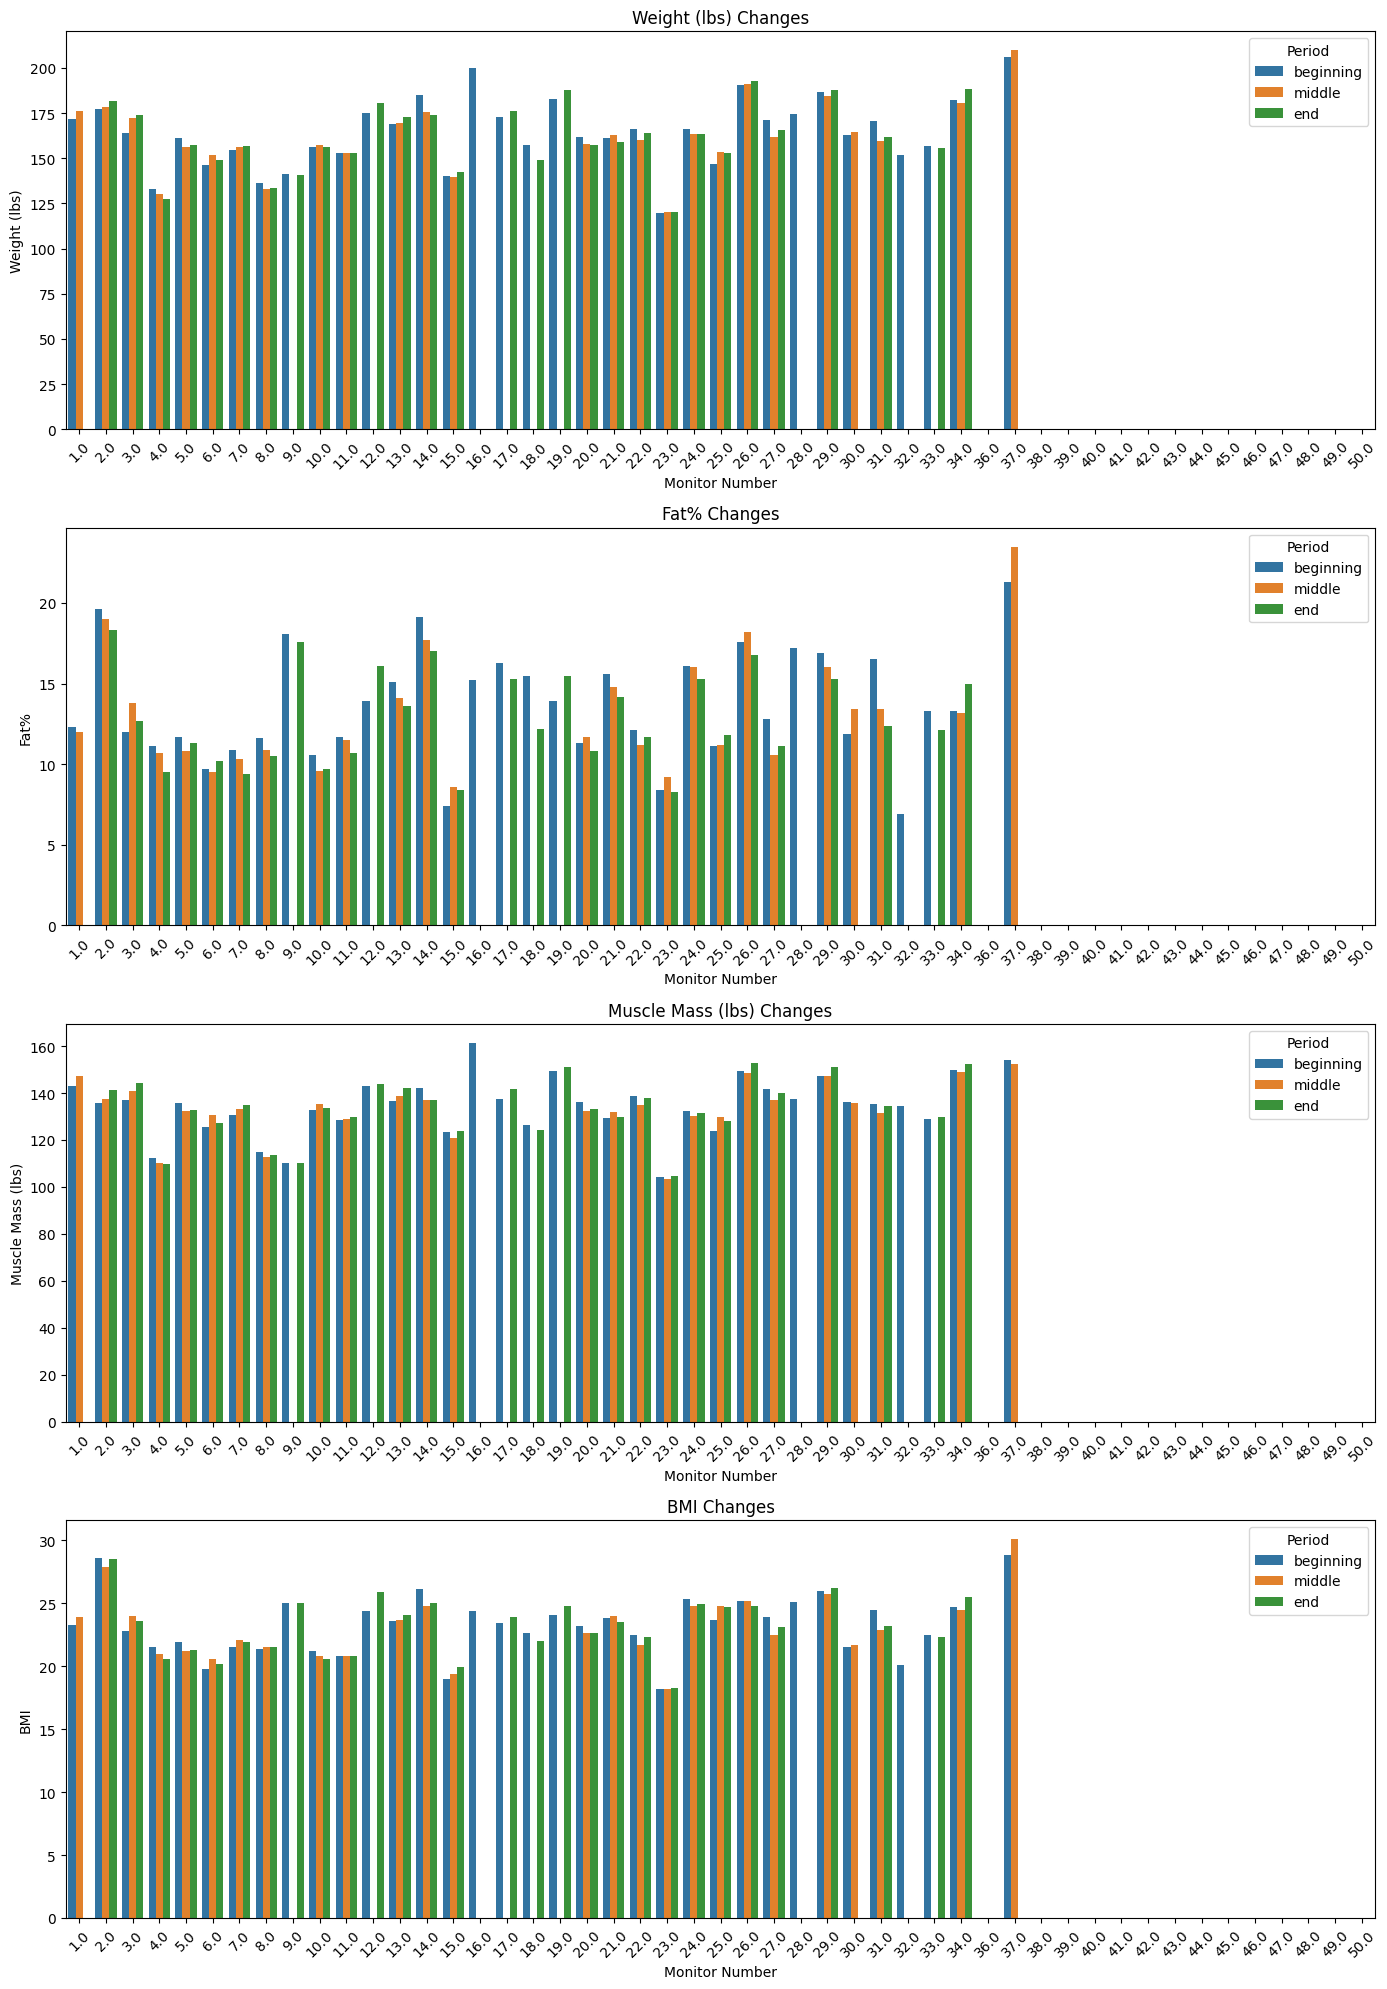

In [24]:
# List of key metrics to analyze
metrics = ['Weight (lbs)', 'Fat%', 'Muscle Mass (lbs)', 'BMI']

# Ensure all columns in the end_df have correct suffixes before merging
end_df = end_df.rename(columns={
    'Weight (lbs)': 'Weight (lbs)_end',
    'Fat%': 'Fat%_end',
    'Muscle Mass (lbs)': 'Muscle Mass (lbs)_end',
    'BMI': 'BMI_end'
})

# Combine the dataframes based on Monitor Number and Subject
combined_df = pd.merge(beginning_df, middle_df, on=['Monitor Number', 'Subject'], suffixes=('_beginning', '_middle'))
combined_df = pd.merge(combined_df, end_df, on=['Monitor Number', 'Subject'])

# Create a new dataframe to hold the differences and original values for visualization
diff_df = combined_df.copy()

# Calculate differences for each metric
for metric in metrics:
    diff_df[f'{metric}_diff_beginning_middle'] = diff_df[f'{metric}_middle'] - diff_df[f'{metric}_beginning']
    diff_df[f'{metric}_diff_middle_end'] = diff_df[f'{metric}_end'] - diff_df[f'{metric}_middle']
    diff_df[f'{metric}_diff_beginning_end'] = diff_df[f'{metric}_end'] - diff_df[f'{metric}_beginning']

# Melt the dataframe for easier plotting
melted_df = diff_df.melt(id_vars=['Monitor Number', 'Subject'], 
                         value_vars=[f'{metric}_beginning' for metric in metrics] + 
                                    [f'{metric}_middle' for metric in metrics] + 
                                    [f'{metric}_end' for metric in metrics] + 
                                    [f'{metric}_diff_beginning_middle' for metric in metrics] +
                                    [f'{metric}_diff_middle_end' for metric in metrics] +
                                    [f'{metric}_diff_beginning_end' for metric in metrics],
                         var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
melted_df[['Metric', 'Period']] = melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Filter out the difference values for clarity in bar graph
filtered_df = melted_df[~melted_df['Period'].str.contains('diff')]

# Set up the matplotlib figure
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 20))

# Plot each metric
for i, metric in enumerate(metrics):
    metric_df = filtered_df[filtered_df['Metric'] == metric]
    sns.barplot(ax=axes[i], data=metric_df, x='Monitor Number', y='Value', hue='Period')
    axes[i].set_title(f'{metric} Changes')
    axes[i].set_xlabel('Monitor Number')
    axes[i].set_ylabel(metric)
    axes[i].legend(title='Period')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


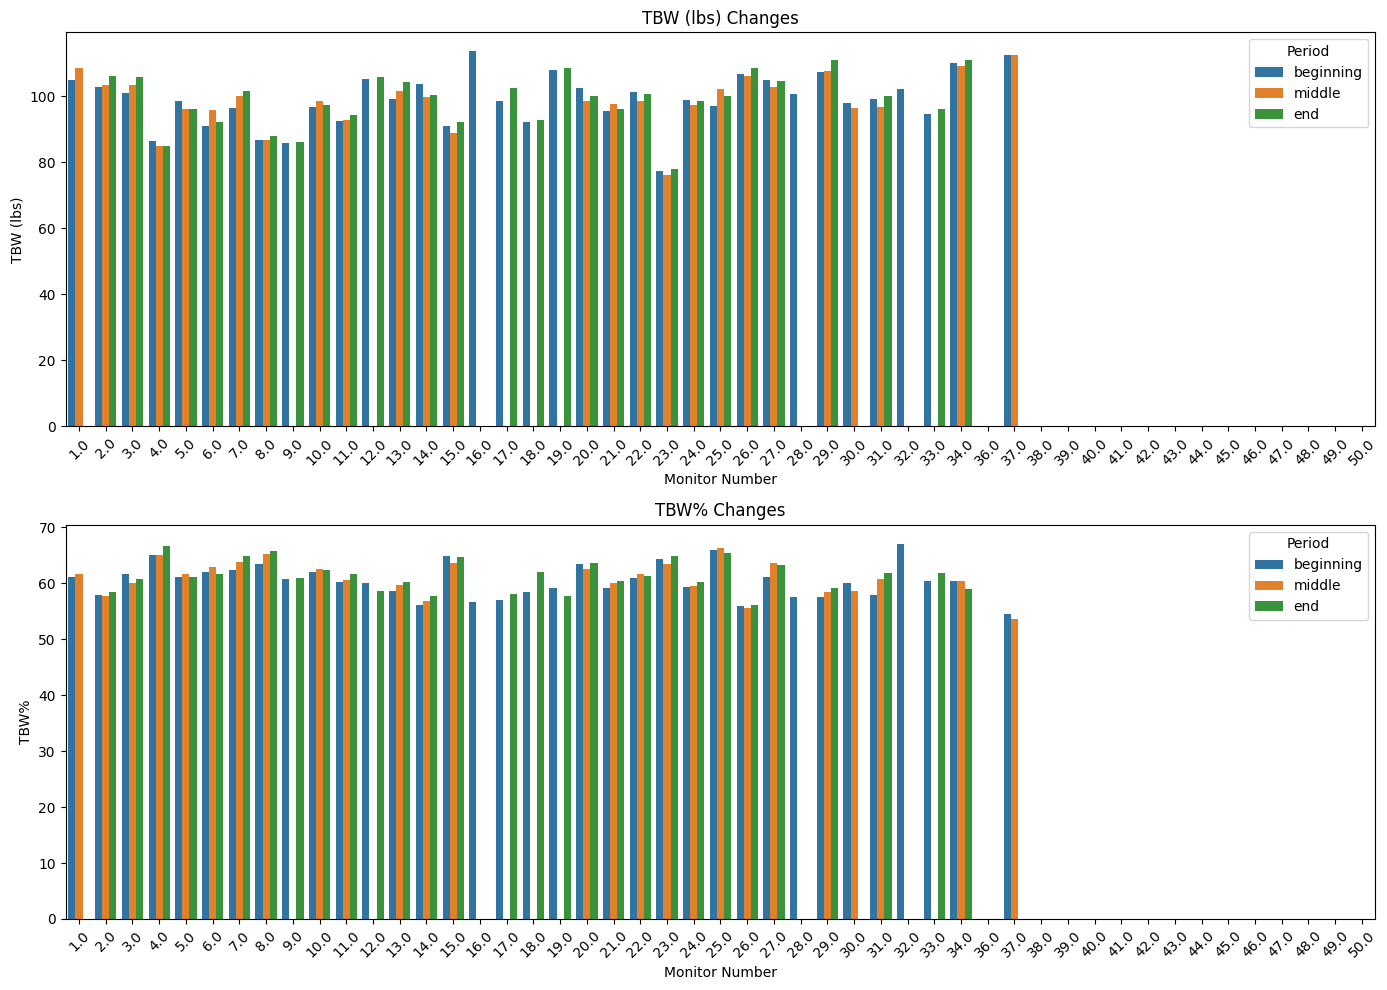

In [25]:
# List of hydration metrics
hydration_metrics = ['TBW (lbs)', 'TBW%']

# Rename the columns in end_df for hydration metrics
end_df = end_df.rename(columns={
    'TBW (lbs)': 'TBW (lbs)_end',
    'TBW%': 'TBW%_end'
})

# Recombine the dataframes to include the hydration metrics
combined_df = pd.merge(beginning_df, middle_df, on=['Monitor Number', 'Subject'], suffixes=('_beginning', '_middle'))
combined_df = pd.merge(combined_df, end_df, on=['Monitor Number', 'Subject'])

# Create a new dataframe to hold the differences for hydration metrics
hydration_diff_df = combined_df.copy()

# Calculate differences for each hydration metric
for metric in hydration_metrics:
    hydration_diff_df[f'{metric}_diff_beginning_middle'] = hydration_diff_df[f'{metric}_middle'] - hydration_diff_df[f'{metric}_beginning']
    hydration_diff_df[f'{metric}_diff_middle_end'] = hydration_diff_df[f'{metric}_end'] - hydration_diff_df[f'{metric}_middle']
    hydration_diff_df[f'{metric}_diff_beginning_end'] = hydration_diff_df[f'{metric}_end'] - hydration_diff_df[f'{metric}_beginning']

# Melt the dataframe for easier plotting
hydration_melted_df = hydration_diff_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                             value_vars=[f'{metric}_beginning' for metric in hydration_metrics] + 
                                                        [f'{metric}_middle' for metric in hydration_metrics] + 
                                                        [f'{metric}_end' for metric in hydration_metrics] + 
                                                        [f'{metric}_diff_beginning_middle' for metric in hydration_metrics] +
                                                        [f'{metric}_diff_middle_end' for metric in hydration_metrics] +
                                                        [f'{metric}_diff_beginning_end' for metric in hydration_metrics],
                                             var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
hydration_melted_df[['Metric', 'Period']] = hydration_melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Filter out the difference values for clarity in bar graph
hydration_filtered_df = hydration_melted_df[~hydration_melted_df['Period'].str.contains('diff')]

# Set up the matplotlib figure
fig, axes = plt.subplots(len(hydration_metrics), 1, figsize=(14, 10))

# Plot each hydration metric
for i, metric in enumerate(hydration_metrics):
    metric_df = hydration_filtered_df[hydration_filtered_df['Metric'] == metric]
    sns.barplot(ax=axes[i], data=metric_df, x='Monitor Number', y='Value', hue='Period')
    axes[i].set_title(f'{metric} Changes')
    axes[i].set_xlabel('Monitor Number')
    axes[i].set_ylabel(metric)
    axes[i].legend(title='Period')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyzing Sit and Reach Test Differences

In [26]:
# Load the new Excel files with Sit and Reach Test data
file_paths = [
    "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Spring 2024/Spring 2024 Baseline Measurements Beginning of Semester.xlsx",
    "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Spring 2024/Spring 2024 Baseline Measurements Middle of Semester.xlsx",
    "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Spring 2024/Spring 2024 Baseline Measurements End of Semester.xlsx"
]

# Read the Excel files with all sheets
beginning_dfs = pd.read_excel(file_paths[0], sheet_name=None)
middle_dfs = pd.read_excel(file_paths[1], sheet_name=None)
end_dfs = pd.read_excel(file_paths[2], sheet_name=None)

# Check the sheet names and their content to locate the Sit and Reach Test data
beginning_sheet_names = list(beginning_dfs.keys())
middle_sheet_names = list(middle_dfs.keys())
end_sheet_names = list(end_dfs.keys())

beginning_sheet_names, middle_sheet_names, end_sheet_names


(['BIA (12224)',
  'Sit and Reach Test (12224)',
  'Yo-Yo Test (123-2424)',
  '10 Yard Dash',
  'T-test',
  'Vertec',
  '1.5 Mile Run Test'],
 ['BIA (31224)',
  'Sit and Reach Test (31224)',
  'Vertec (31224)',
  '10 Yard Dash (31224)',
  'T-test (31224)',
  '1.5 Mile Run Test (31324)'],
 ['BIA (41824)',
  'Sit and Reach Test (41824)',
  'Vertec (41824)',
  '10 Yard Dash (42224)',
  'T-test (42224)',
  '1.5 Mile Run Test (42224)'])

In [27]:
# Load the Sit and Reach Test data from the specific sheets
beginning_sit_reach_df = beginning_dfs['Sit and Reach Test (12224)']
middle_sit_reach_df = middle_dfs['Sit and Reach Test (31224)']
end_sit_reach_df = end_dfs['Sit and Reach Test (41824)']

# Display the first few rows of each Sit and Reach Test dataframe to understand their structure
beginning_sit_reach_df.head(), middle_sit_reach_df.head(), end_sit_reach_df.head()


(   Monitor Number                 Subject  Sit & Reach (cm)
 0             1.0           Alec Griswold             5.715
 1             2.0            Logen Mackey            17.145
 2             3.0          Jonathan Leary            33.020
 3             4.0  Alejandro Lazo Pacheco            31.115
 4             5.0            James Aubery            15.875,
    Monitor Number                 Subject  Sit & Reach (cm)
 0             1.0           Alec Griswold            13.335
 1             2.0            Logen Mackey            16.510
 2             3.0          Jonathan Leary            35.560
 3             4.0  Alejandro Lazo Pacheco            34.290
 4             5.0            James Aubery            17.145,
    Monitor Number                 Subject  Sit & Reach (cm)
 0             1.0           Alec Griswold             8.890
 1             2.0            Logen Mackey            20.320
 2             3.0          Jonathan Leary            35.560
 3             4.0  Al

/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_877/191599559.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax, data=sit_reach_melted_df, x='Monitor Number', y='Value', hue='Period', ci=None)


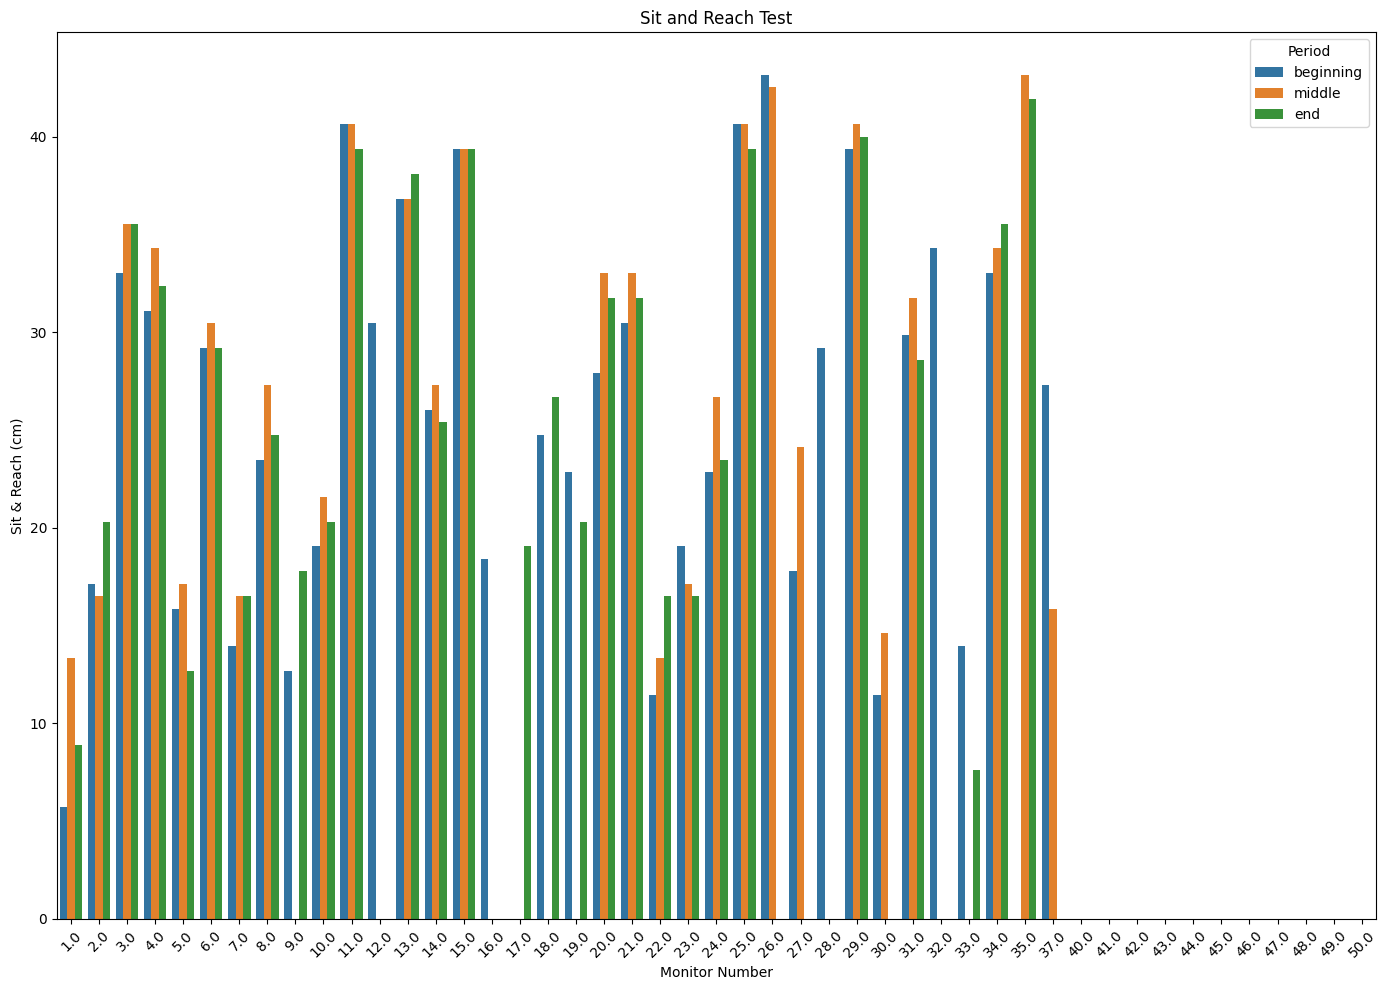

In [28]:

# Rename columns for consistency
beginning_sit_reach_df = beginning_sit_reach_df.rename(columns={'Sit & Reach (cm)': 'Sit & Reach_beginning'})
middle_sit_reach_df = middle_sit_reach_df.rename(columns={'Sit & Reach (cm)': 'Sit & Reach_middle'})
end_sit_reach_df = end_sit_reach_df.rename(columns={'Sit & Reach (cm)': 'Sit & Reach_end'})

# Merge dataframes on 'Monitor Number' and 'Subject'
combined_sit_reach_df = pd.merge(beginning_sit_reach_df[['Monitor Number', 'Subject', 'Sit & Reach_beginning']],
                                 middle_sit_reach_df[['Monitor Number', 'Subject', 'Sit & Reach_middle']],
                                 on=['Monitor Number', 'Subject'])
combined_sit_reach_df = pd.merge(combined_sit_reach_df,
                                 end_sit_reach_df[['Monitor Number', 'Subject', 'Sit & Reach_end']],
                                 on=['Monitor Number', 'Subject'])

# Melt the dataframe for easier plotting
sit_reach_melted_df = combined_sit_reach_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                                 value_vars=['Sit & Reach_beginning', 'Sit & Reach_middle', 'Sit & Reach_end'],
                                                 var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
sit_reach_melted_df[['Metric', 'Period']] = sit_reach_melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the Sit and Reach Test without error bars
sns.barplot(ax=ax, data=sit_reach_melted_df, x='Monitor Number', y='Value', hue='Period', ci=None)
ax.set_title('Sit and Reach Test')
ax.set_xlabel('Monitor Number')
ax.set_ylabel('Sit & Reach (cm)')
ax.legend(title='Period')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Vertec

In [29]:
# Load the Vertec Test data from the specific sheets
beginning_vertec_df = beginning_dfs['Vertec']
middle_vertec_df = middle_dfs['Vertec (31224)']
end_vertec_df = end_dfs['Vertec (41824)']

# Display the first few rows of each Vertec Test dataframe to understand their structure
beginning_vertec_df.head(), middle_vertec_df.head(), end_vertec_df.head()


(   Monitor Number                 Subject Unnamed: 2  Unnamed: 3 Unnamed: 4
 0             1.0           Alec Griswold        NaN         NaN        NaN
 1             2.0            Logen Mackey        NaN         NaN        NaN
 2             3.0          Jonathan Leary        NaN         NaN        NaN
 3             4.0  Alejandro Lazo Pacheco        NaN         NaN        NaN
 4             5.0            James Aubery        NaN         NaN        NaN,
    Monitor Number                 Subject  Height with Arm  Trial 1  Trial 2  \
 0             1.0           Alec Griswold             88.5    108.5    111.0   
 1             2.0            Logen Mackey             82.5    105.0    106.0   
 2             3.0          Jonathan Leary             86.5    109.5    111.0   
 3             4.0  Alejandro Lazo Pacheco             81.0    104.0    103.0   
 4             5.0            James Aubery             87.0    111.5    113.0   
 
    Trial 3 (only if massive difference)  Vertica

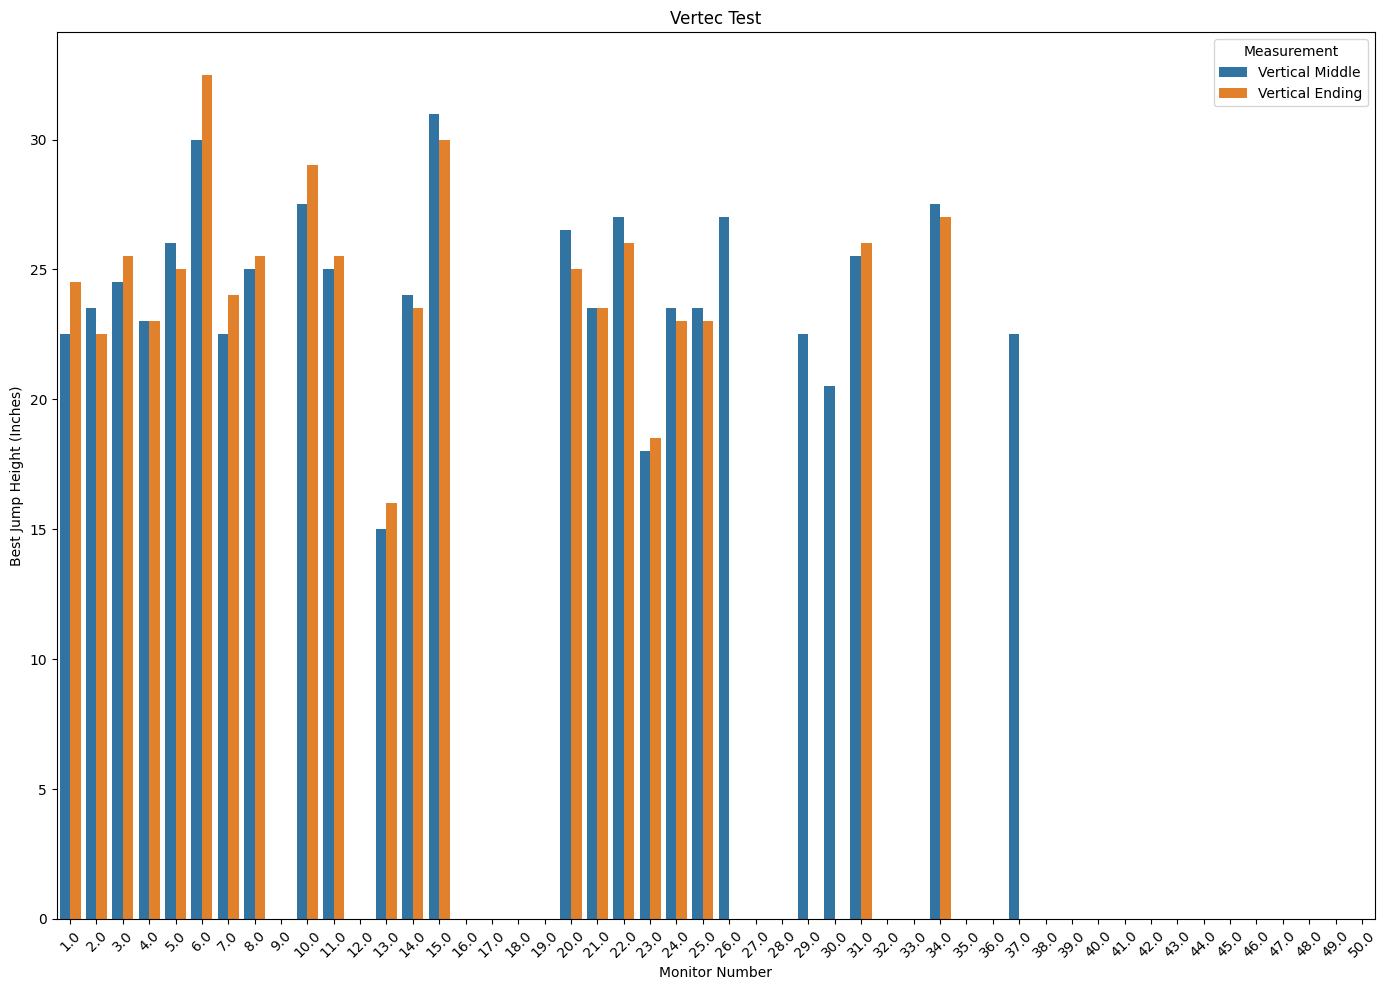

In [30]:
# Extract relevant columns from the Vertec sheets
middle_vertec_df = middle_vertec_df[['Monitor Number', 'Subject', 'Vertical (inches)']]
end_vertec_df = end_vertec_df[['Monitor Number', 'Subject', 'Vertical (inches)']]

# Rename columns for consistency
middle_vertec_df = middle_vertec_df.rename(columns={'Vertical (inches)': 'Vertical Middle'})
end_vertec_df = end_vertec_df.rename(columns={'Vertical (inches)': 'Vertical Ending'})

# Merge dataframes on 'Monitor Number' and 'Subject'
combined_vertec_df = pd.merge(middle_vertec_df[['Monitor Number', 'Subject', 'Vertical Middle']],
                              end_vertec_df[['Monitor Number', 'Subject', 'Vertical Ending']],
                              on=['Monitor Number', 'Subject'])

# Melt the dataframe for easier plotting
vertec_melted_df = combined_vertec_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                           value_vars=['Vertical Middle','Vertical Ending'],
                                           var_name='Measurement', value_name='Value')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the Vertec Test data
sns.barplot(ax=ax, data=vertec_melted_df, x='Monitor Number', y='Value', hue='Measurement')
ax.set_title('Vertec Test')
ax.set_xlabel('Monitor Number')
ax.set_ylabel('Best Jump Height (Inches)')
ax.legend(title='Measurement')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 10 Yard Dash

In [31]:
# Load the 10 Yard Dash Test data from the specific sheets
beginning_10yd_df = beginning_dfs['10 Yard Dash']
middle_10yd_df = middle_dfs['10 Yard Dash (31224)']
end_10yd_df = end_dfs['10 Yard Dash (42224)']

# Display the first few rows of each 10 Yard Dash Test dataframe to understand their structure
beginning_10yd_df.head(), middle_10yd_df.head(), end_10yd_df.head()


(   Monitor Number                 Subject Unnamed: 2  Unnamed: 3 Unnamed: 4
 0             1.0           Alec Griswold        NaN         NaN        NaN
 1             2.0            Logen Mackey        NaN         NaN        NaN
 2             3.0          Jonathan Leary        NaN         NaN        NaN
 3             4.0  Alejandro Lazo Pacheco        NaN         NaN        NaN
 4             5.0            James Aubery        NaN         NaN        NaN,
    Monitor Number                 Subject  Trial 1 (seconds)  \
 0             1.0           Alec Griswold                NaN   
 1             2.0            Logen Mackey                NaN   
 2             3.0          Jonathan Leary                NaN   
 3             4.0  Alejandro Lazo Pacheco               1.49   
 4             5.0            James Aubery                NaN   
 
    Trial 2 (seconds)  Trial 3 (seconds)  
 0                NaN                NaN  
 1                NaN                NaN  
 2              

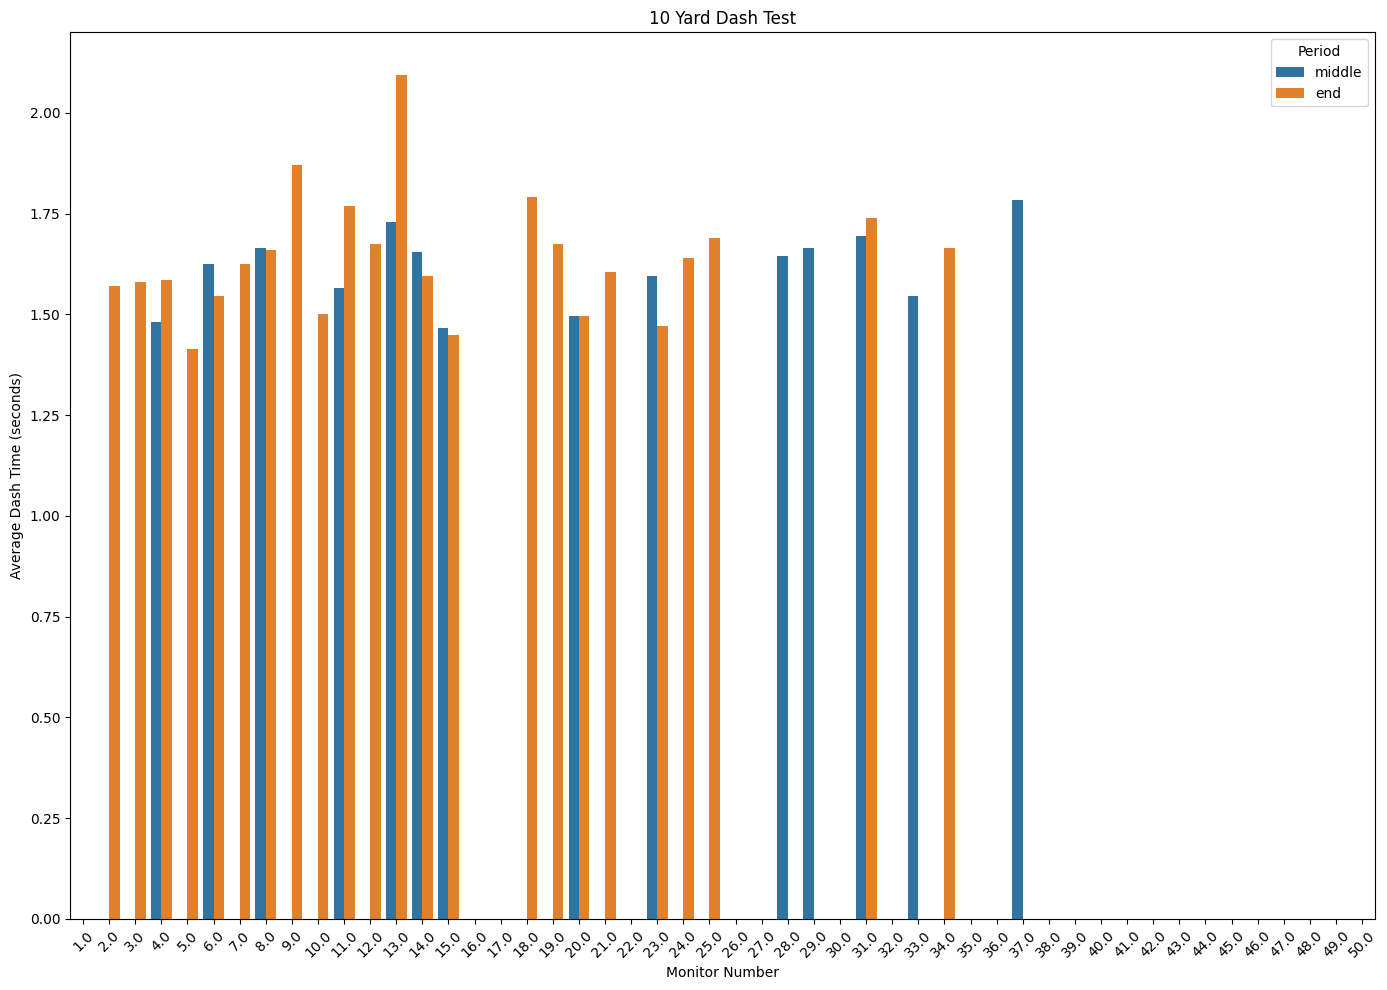

In [32]:
# Extract relevant columns from middle and end 10 Yard Dash sheets
middle_10yd_df = middle_10yd_df[['Monitor Number', 'Subject', 'Trial 1 (seconds)', 'Trial 2 (seconds)']]
end_10yd_df = end_10yd_df[['Monitor Number', 'Subject', 'Trial 1 (seconds)', 'Trial 2 (seconds)']]

# Calculate average dash time for each subject
middle_10yd_df['Average Dash Time_middle'] = middle_10yd_df[['Trial 1 (seconds)', 'Trial 2 (seconds)']].mean(axis=1)
end_10yd_df['Average Dash Time_end'] = end_10yd_df[['Trial 1 (seconds)', 'Trial 2 (seconds)']].mean(axis=1)

# Merge dataframes on 'Monitor Number' and 'Subject'
combined_10yd_df = pd.merge(middle_10yd_df[['Monitor Number', 'Subject', 'Average Dash Time_middle']],
                            end_10yd_df[['Monitor Number', 'Subject', 'Average Dash Time_end']],
                            on=['Monitor Number', 'Subject'])

# Calculate differences in average dash times
combined_10yd_df['Average Dash Time_diff'] = combined_10yd_df['Average Dash Time_end'] - combined_10yd_df['Average Dash Time_middle']

# Melt the dataframe for easier plotting
dash_melted_df = combined_10yd_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                       value_vars=['Average Dash Time_middle', 'Average Dash Time_end', 'Average Dash Time_diff'],
                                       var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
dash_melted_df[['Metric', 'Period']] = dash_melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Filter out the difference values for clarity in bar graph
dash_filtered_df = dash_melted_df[dash_melted_df['Period'] != 'diff']

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the 10 Yard Dash Test data
sns.barplot(ax=ax, data=dash_filtered_df, x='Monitor Number', y='Value', hue='Period')
ax.set_title('10 Yard Dash Test')
ax.set_xlabel('Monitor Number')
ax.set_ylabel('Average Dash Time (seconds)')
ax.legend(title='Period')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# T-Test

In [33]:
# Load the T-test data from the specific sheets
beginning_ttest_df = beginning_dfs['T-test']
middle_ttest_df = middle_dfs['T-test (31224)']
end_ttest_df = end_dfs['T-test (42224)']

# Display the first few rows of each T-test dataframe to understand their structure
beginning_ttest_df.head(), middle_ttest_df.head(), end_ttest_df.head()


(   Monitor Number                 Subject Unnamed: 2  Unnamed: 3 Unnamed: 4
 0             1.0           Alec Griswold        NaN         NaN        NaN
 1             2.0            Logen Mackey        NaN         NaN        NaN
 2             3.0          Jonathan Leary        NaN         NaN        NaN
 3             4.0  Alejandro Lazo Pacheco        NaN         NaN        NaN
 4             5.0            James Aubery        NaN         NaN        NaN,
    Monitor Number                 Subject  Trial 1 (seconds)  \
 0             1.0           Alec Griswold                NaN   
 1             2.0            Logen Mackey                NaN   
 2             3.0          Jonathan Leary                NaN   
 3             4.0  Alejandro Lazo Pacheco               9.54   
 4             5.0            James Aubery                NaN   
 
    Trial 2 (seconds)  Trial 3 (seconds)  
 0                NaN                NaN  
 1                NaN                NaN  
 2              

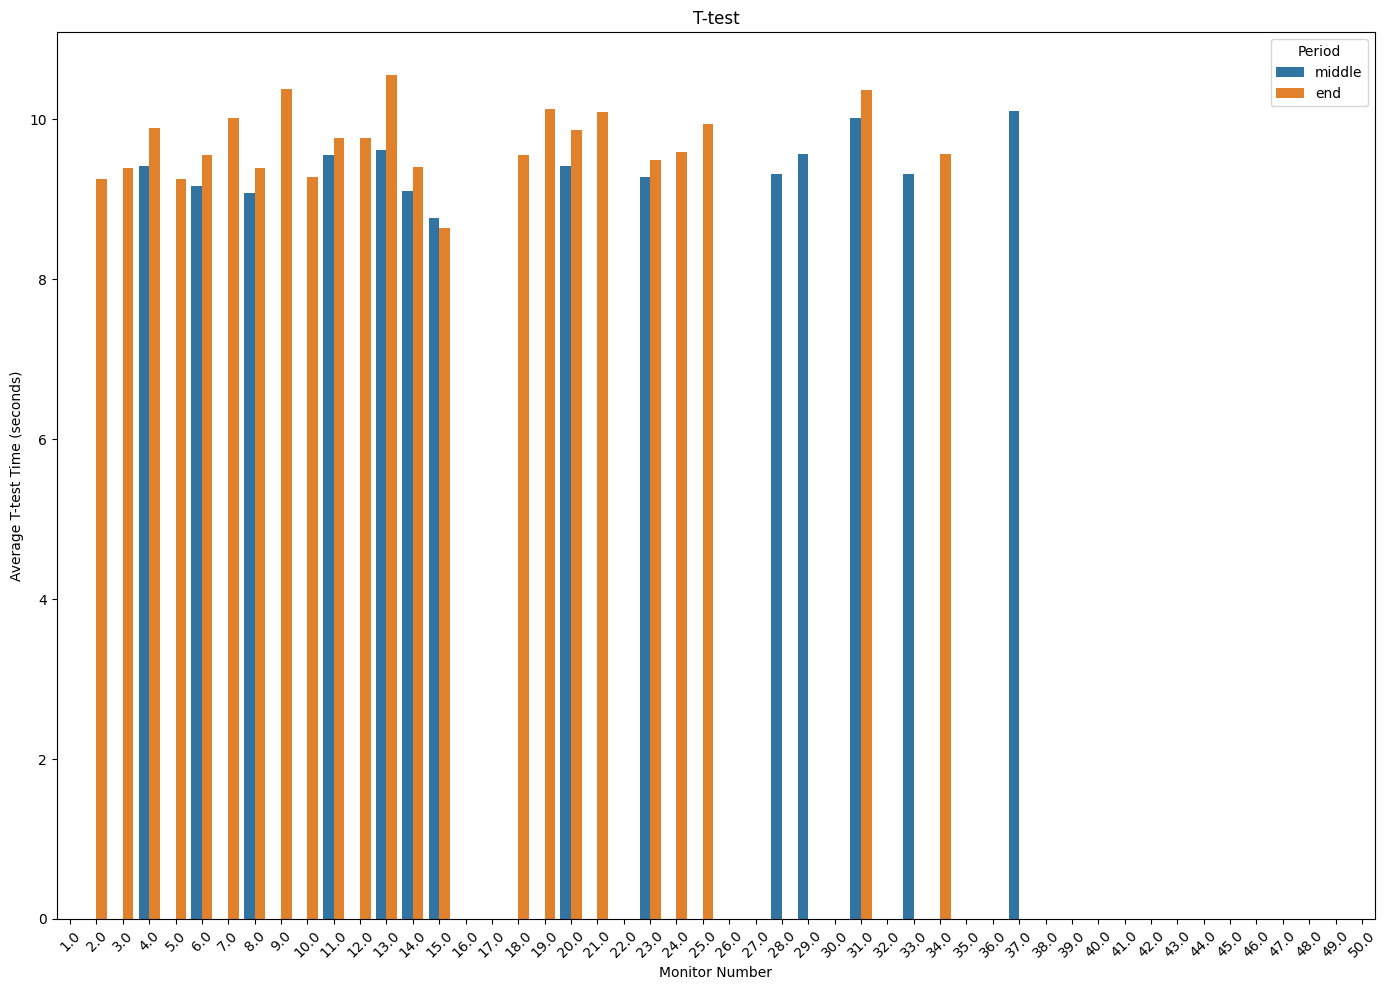

In [34]:
# Extract relevant columns from middle and end T-test sheets
middle_ttest_df = middle_ttest_df[['Monitor Number', 'Subject', 'Trial 1 (seconds)', 'Trial 2 (seconds)']]
end_ttest_df = end_ttest_df[['Monitor Number', 'Subject', 'Trial 1 (seconds)', 'Trial 2 (seconds)']]

# Calculate average T-test time for each subject
middle_ttest_df['Average T-test Time_middle'] = middle_ttest_df[['Trial 1 (seconds)', 'Trial 2 (seconds)']].mean(axis=1)
end_ttest_df['Average T-test Time_end'] = end_ttest_df[['Trial 1 (seconds)', 'Trial 2 (seconds)']].mean(axis=1)

# Merge dataframes on 'Monitor Number' and 'Subject'
combined_ttest_df = pd.merge(middle_ttest_df[['Monitor Number', 'Subject', 'Average T-test Time_middle']],
                             end_ttest_df[['Monitor Number', 'Subject', 'Average T-test Time_end']],
                             on=['Monitor Number', 'Subject'])

# Calculate differences in average T-test times
combined_ttest_df['Average T-test Time_diff'] = combined_ttest_df['Average T-test Time_end'] - combined_ttest_df['Average T-test Time_middle']

# Melt the dataframe for easier plotting
ttest_melted_df = combined_ttest_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                         value_vars=['Average T-test Time_middle', 'Average T-test Time_end', 'Average T-test Time_diff'],
                                         var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
ttest_melted_df[['Metric', 'Period']] = ttest_melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Filter out the difference values for clarity in bar graph
ttest_filtered_df = ttest_melted_df[ttest_melted_df['Period'] != 'diff']

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the T-test data
sns.barplot(ax=ax, data=ttest_filtered_df, x='Monitor Number', y='Value', hue='Period')
ax.set_title('T-test')
ax.set_xlabel('Monitor Number')
ax.set_ylabel('Average T-test Time (seconds)')
ax.legend(title='Period')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 1.5 Mile Run

In [35]:
# Load the 1.5 Mile Run Test data from the specific sheets
beginning_run_df = beginning_dfs['1.5 Mile Run Test']
middle_run_df = middle_dfs['1.5 Mile Run Test (31324)']
end_run_df = end_dfs['1.5 Mile Run Test (42224)']

# Display the first few rows of each 1.5 Mile Run Test dataframe to understand their structure
beginning_run_df.head(), middle_run_df.head(), end_run_df.head()


(   Monitor Number                 Subject Unnamed: 2  Unnamed: 3 Unnamed: 4
 0             1.0           Alec Griswold        NaN         NaN        NaN
 1             2.0            Logen Mackey        NaN         NaN        NaN
 2             3.0          Jonathan Leary        NaN         NaN        NaN
 3             4.0  Alejandro Lazo Pacheco        NaN         NaN        NaN
 4             5.0            James Aubery        NaN         NaN        NaN,
    Monitor Number                 Subject Time (Minutes)  VO2 Max  \
 0             1.0           Alec Griswold        8:25.46      NaN   
 1             2.0            Logen Mackey            NaN      NaN   
 2             3.0          Jonathan Leary        8:46.20      NaN   
 3             4.0  Alejandro Lazo Pacheco        8:16.44      NaN   
 4             5.0            James Aubery        7:43.35      NaN   
 
                                           Unnamed: 4  \
 0  Pretty sure these are invalid results. Poor me...   
 

/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_877/3680094761.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_run_df['Time_seconds_middle'] = middle_run_df['Time (Minutes)'].apply(convert_time_to_seconds)
/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_877/3680094761.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_run_df['Time_seconds_end'] = end_run_df['Time (Minutes)'].apply(convert_time_to_seconds)


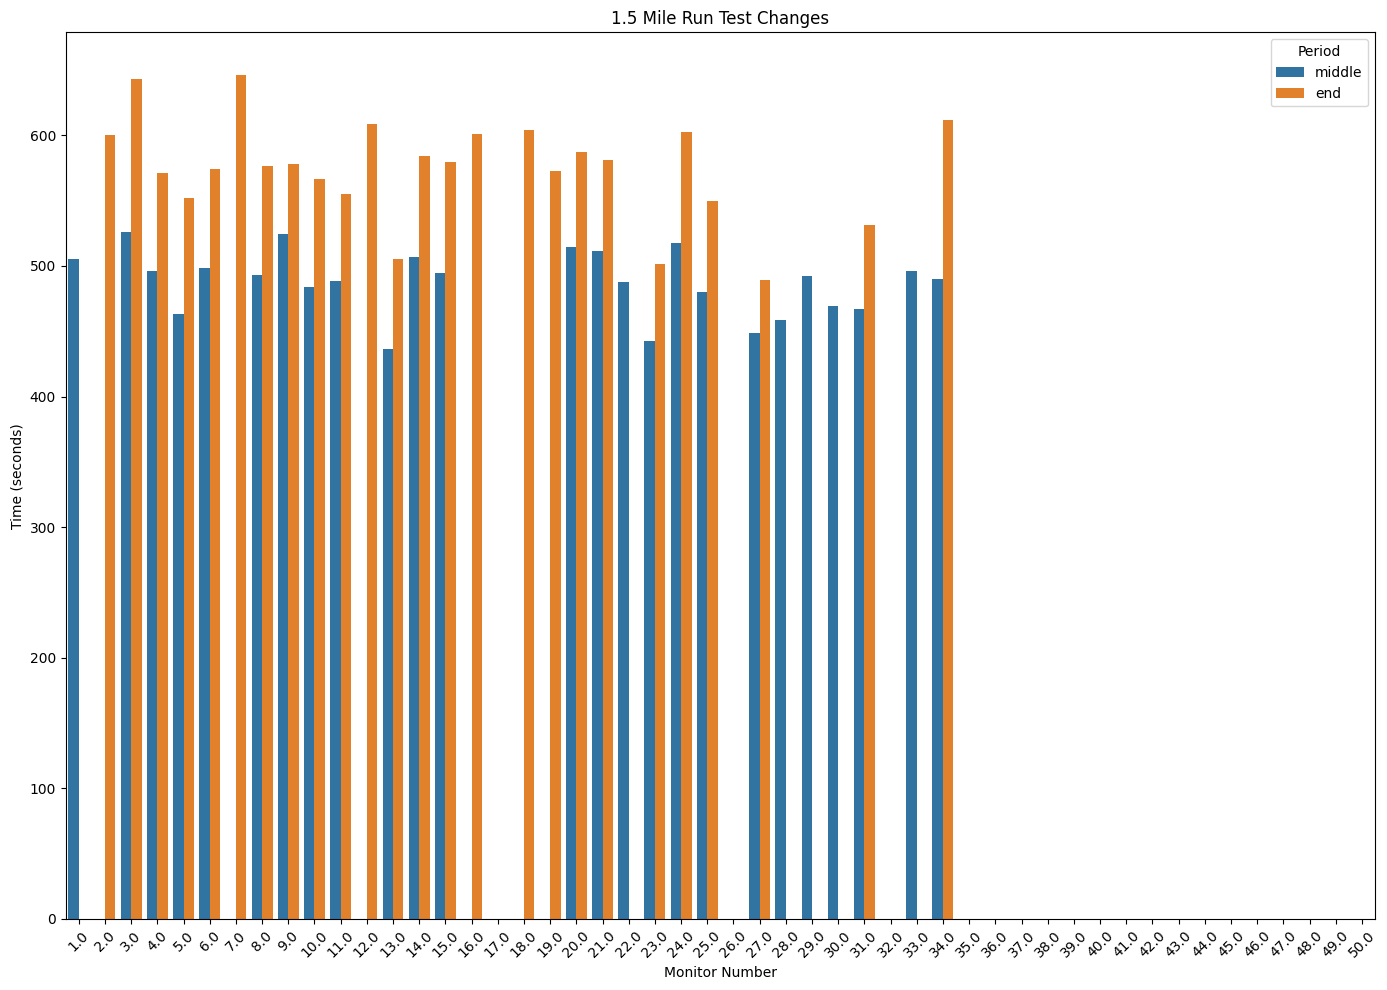

,Monitor Number,Subject,End Run Time (minutes:seconds),Percentile Rank
0,1.0,Alec Griswold,None,N/A
1,2.0,Logen Mackey,9:59,80thth
2,3.0,Jonathan Leary,10:42,70thth
3,4.0,Alejandro Lazo Pacheco,9:30,90thth
4,5.0,James Aubery,9:11,90thth
5,6.0,Nathan Russell,9:34,80thth
6,7.0,Nico Morelo,10:46,70thth
7,8.0,Jayson McGaffin,9:36,80thth
8,9.0,Alessandro Sanchez,9:38,80thth
9,10.0,Ethan Opiela,9:26,90thth


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert time format to total seconds
def convert_time_to_seconds(time_str):
    if pd.isnull(time_str):
        return None
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Function to convert seconds back to time format
def convert_seconds_to_time(seconds):
    if pd.isnull(seconds):
        return None
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f'{minutes}:{seconds:02}'



# Extract relevant columns from middle and end 1.5 Mile Run sheets
middle_run_df = middle_run_df[['Monitor Number', 'Subject', 'Time (Minutes)']]
end_run_df = end_run_df[['Monitor Number', 'Subject', 'Time (Minutes)']]

# Apply the conversion function to the time columns
middle_run_df['Time_seconds_middle'] = middle_run_df['Time (Minutes)'].apply(convert_time_to_seconds)
end_run_df['Time_seconds_end'] = end_run_df['Time (Minutes)'].apply(convert_time_to_seconds)

# Merge dataframes on 'Monitor Number' and 'Subject'
combined_run_df = pd.merge(middle_run_df[['Monitor Number', 'Subject', 'Time_seconds_middle']],
                           end_run_df[['Monitor Number', 'Subject', 'Time_seconds_end']],
                           on=['Monitor Number', 'Subject'])

# Assuming participant information is available as a DataFrame (example structure)
# This should be updated with actual participant data including their age group and gender
participants_info = pd.DataFrame({
    'Monitor Number': combined_run_df['Monitor Number'],
    'Age_Group': ['20-29'] * len(combined_run_df),  # Placeholder values, update with actual age groups
    'Gender': ['Men'] * len(combined_run_df),  # Placeholder values, update with actual genders
})

# Calculate differences in run times
combined_run_df['Time_seconds_diff'] = combined_run_df['Time_seconds_end'] - combined_run_df['Time_seconds_middle']

# Melt the dataframe for easier plotting
run_melted_df = combined_run_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                     value_vars=['Time_seconds_middle', 'Time_seconds_end', 'Time_seconds_diff'],
                                     var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
run_melted_df[['Metric', 'Period']] = run_melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Filter out the difference values for clarity in bar graph
run_filtered_df = run_melted_df[run_melted_df['Period'] != 'diff']

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the 1.5 Mile Run Test data
sns.barplot(ax=ax, data=run_filtered_df, x='Monitor Number', y='Value', hue='Period')
ax.set_title('1.5 Mile Run Test Changes')
ax.set_xlabel('Monitor Number')
ax.set_ylabel('Time (seconds)')
ax.legend(title='Period')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Extract normative data from the image (manually created for the example)
normative_data = {
    'Age_Group': ['20-29', '30-39', '40-49', '50-59', '60-69'],
    '90th_Percentile': [574, 592, 609, 669, 730],  # Values in seconds
    '80th_Percentile': [608, 622, 665, 734, 808],
    '70th_Percentile': [649, 677, 712, 786, 891],
    '60th_Percentile': [687, 731, 735, 833, 969],
    '50th_Percentile': [718, 745, 785, 881, 1048],
    '40th_Percentile': [749, 773, 830, 915, 1127],
    '30th_Percentile': [788, 828, 873, 975, 1214],
    '20th_Percentile': [838, 860, 918, 1050, 1435],
    '10th_Percentile': [910, 1020, 1024, 1312, 1592],
}

# Create a DataFrame for normative data
norm_df = pd.DataFrame(normative_data)

# Function to find percentile rank
def find_percentile(time, age_group):
    percentiles = norm_df[norm_df['Age_Group'] == age_group]
    for col in percentiles.columns[1:]:
        if time <= percentiles[col].values[0]:
            return col.split('_')[0] + 'th'
    return 'N/A'

# Merge participant info with combined run data
final_df = pd.merge(combined_run_df, participants_info, on='Monitor Number')

# Find percentile rank for each participant
final_df['Percentile_Rank'] = final_df.apply(lambda row: find_percentile(row['Time_seconds_end'], row['Age_Group']), axis=1)

# Convert end run times back to minutes:seconds format
final_df['End Run Time (minutes:seconds)'] = final_df['Time_seconds_end'].apply(convert_seconds_to_time)

# Create a summary table
summary_table = final_df[['Monitor Number', 'Subject', 'End Run Time (minutes:seconds)', 'Percentile_Rank']]
summary_table.columns = ['Monitor Number', 'Subject', 'End Run Time (minutes:seconds)', 'Percentile Rank']
summary_table

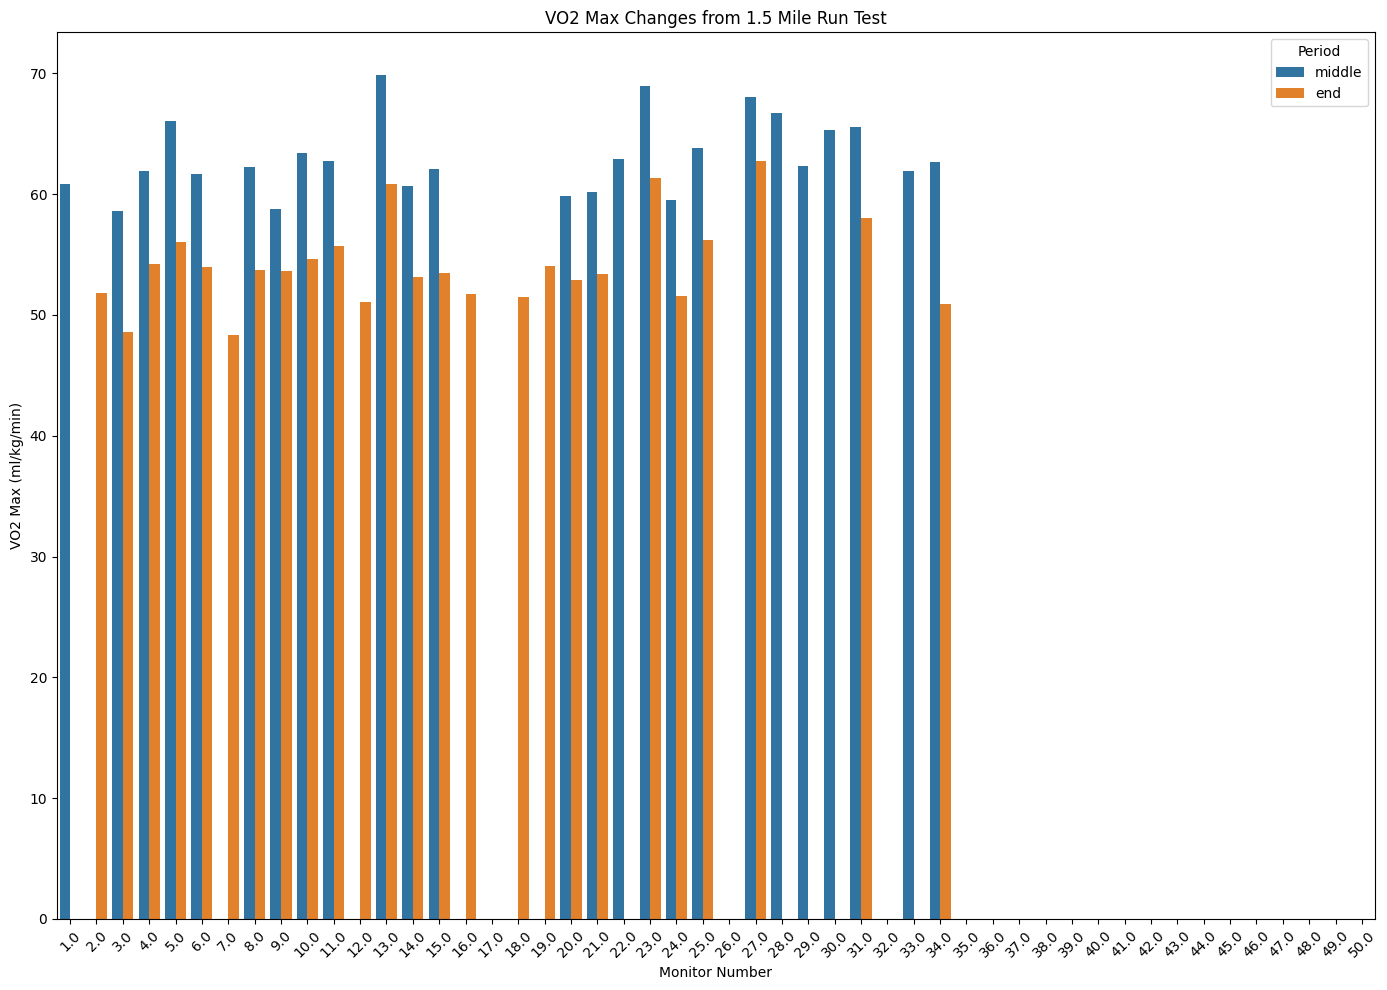

,Monitor Number,Subject,VO2 Max (end)
0,1.0,Alec Griswold,NaN
1,2.0,Logen Mackey,51.802415
2,3.0,Jonathan Leary,48.574190
3,4.0,Alejandro Lazo Pacheco,54.258398
4,5.0,James Aubery,56.021884
5,6.0,Nathan Russell,53.986925
6,7.0,Nico Morelo,48.325293
7,8.0,Jayson McGaffin,53.750559
8,9.0,Alessandro Sanchez,53.628868
9,10.0,Ethan Opiela,54.638168


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert time format to total seconds
def convert_time_to_seconds(time_str):
    if pd.isnull(time_str):
        return None
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Function to convert seconds back to time format
def convert_seconds_to_time(seconds):
    if pd.isnull(seconds):
        return None
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f'{minutes}:{seconds:02}'

# Assuming participant information is available as a DataFrame (example structure)
# This should be updated with actual participant data including their age group and gender
participants_info = pd.DataFrame({
    'Monitor Number': combined_run_df['Monitor Number'],
    'Age_Group': ['20-29'] * len(combined_run_df),  # Placeholder values, update with actual age groups
    'Gender': ['Men'] * len(combined_run_df),  # Placeholder values, update with actual genders
})

# Extract relevant columns from middle and end 1.5 Mile Run sheets
middle_run_df = middle_run_df[['Monitor Number', 'Subject', 'Time (Minutes)']]
end_run_df = end_run_df[['Monitor Number', 'Subject', 'Time (Minutes)']]

# Apply the conversion function to the time columns
middle_run_df['Time_seconds_middle'] = middle_run_df['Time (Minutes)'].apply(convert_time_to_seconds)
end_run_df['Time_seconds_end'] = end_run_df['Time (Minutes)'].apply(convert_time_to_seconds)

# Merge dataframes on 'Monitor Number' and 'Subject'
combined_run_df = pd.merge(middle_run_df[['Monitor Number', 'Subject', 'Time_seconds_middle']],
                           end_run_df[['Monitor Number', 'Subject', 'Time_seconds_end']],
                           on=['Monitor Number', 'Subject'])

# Calculate VO2 Max using the Cooper equation
combined_run_df['VO2_Max_middle'] = 3.5 + (483 / (combined_run_df['Time_seconds_middle'] / 60))
combined_run_df['VO2_Max_end'] = 3.5 + (483 / (combined_run_df['Time_seconds_end'] / 60))

# Calculate differences in VO2 Max
combined_run_df['VO2_Max_diff'] = combined_run_df['VO2_Max_end'] - combined_run_df['VO2_Max_middle']

# Melt the dataframe for easier plotting
vo2_melted_df = combined_run_df.melt(id_vars=['Monitor Number', 'Subject'], 
                                     value_vars=['VO2_Max_middle', 'VO2_Max_end', 'VO2_Max_diff'],
                                     var_name='Measurement', value_name='Value')

# Separate the metric type and the time period
vo2_melted_df[['Metric', 'Period']] = vo2_melted_df['Measurement'].str.rsplit('_', n=1, expand=True)

# Filter out the difference values for clarity in bar graph
vo2_filtered_df = vo2_melted_df[vo2_melted_df['Period'] != 'diff']

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the VO2 Max data
sns.barplot(ax=ax, data=vo2_filtered_df, x='Monitor Number', y='Value', hue='Period')
ax.set_title('VO2 Max Changes from 1.5 Mile Run Test')
ax.set_xlabel('Monitor Number')
ax.set_ylabel('VO2 Max (ml/kg/min)')
ax.legend(title='Period')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a summary table for VO2 Max values from the second test
summary_vo2_table_end = combined_run_df[['Monitor Number', 'Subject', 'VO2_Max_end']]
summary_vo2_table_end.columns = ['Monitor Number', 'Subject', 'VO2 Max (end)']
summary_vo2_table_end

The first test appears to be very invalid. Yes there was differences in commitment toward the test; however, it is such a large difference and understanding how the measuring was done didn't appear to be effective. Therefore, the middle part is considered invalid. The end of the semester is still useable.

# Standard Normal Distributions:

Now looking to standardize these values based on the normative data. Use the averages and standard deviation in the normative data found to create the z-score equation for the mean. Then input each value into the equation: normalized_data = (data - mean) / std_dev

Then, put into a dataframe with the values of each player for later.

In [40]:
import scipy.stats as stats

def compute_mean_std(p25, p75):
    z25 = stats.norm.ppf(0.25)
    z75 = stats.norm.ppf(0.75)
    
    sigma = (p75 - p25) / (z75 - z25)
    mu = p25 - z25 * sigma
    
    return mu, sigma

# Example usage:
p25_body_fat = 22.1
p75_body_fat = 11.5
mean_body_fat, std_body_fat = compute_mean_std(p25_body_fat, p75_body_fat)
print(f"Body Fat Percentage - Mean: {mean_body_fat:.2f}, Std: {std_body_fat:.2f}")

p25_cooper = 800
p75_cooper = 617
mean_cooper, std_cooper = compute_mean_std(p25_cooper, p75_cooper)
print(f"Cooper Test Time - Mean: {mean_cooper:.2f} sec, Std: {std_cooper:.2f} sec")

p25_sit_reach = 27
p75_sit_reach = 36.5
mean_sit_reach, std_sit_reach = compute_mean_std(p25_sit_reach, p75_sit_reach)
print(f"Sit and Reach - Mean: {mean_sit_reach:.2f} cm, Std: {std_sit_reach:.2f} cm")


Body Fat Percentage - Mean: 16.80, Std: -7.86
Cooper Test Time - Mean: 708.50 sec, Std: -135.66 sec
Sit and Reach - Mean: 31.75 cm, Std: 7.04 cm


Some of the other normative data is not in percentile. The values for the study average for TBW are related to a general study found in Kidney International Journal.

I used the data that I got from the players to compute the z-scores. These data weren't all at the same time for some players. There were some that had their last test done at different times. 

In [41]:
# Function to compute mean and standard deviation from percentiles
def compute_mean_std(p25, p75):
    z25 = stats.norm.ppf(0.25)
    z75 = stats.norm.ppf(0.75)
    
    sigma = (p75 - p25) / (z75 - z25)
    mu = p25 - z25 * sigma
    
    return mu, sigma

# Function to compute z-scores
def compute_z_scores(df, mean, std, column_name):
    df[f'{column_name}_zscore'] = (df[column_name] - mean) / std
    return df

# Sample data
data_end = {
    'Player': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '33', '34', '35', '37'],
    'Body_Fat_Percentage': [18.3, 12.7, 9.5, 11.3, 10.2, 9.4, 10.5, 17.6, 9.7, 10.7, 16.1, 13.6, 17, 8.4, 15.2, 12.2, 15.5, 10.8, 14.2, 11.7, 8.3, 15.3, 11.8, 16.8, 11.1, 17.2, 15.3, 13.4, 12.4, 12.1, 15, 6.5, 23.5],
    '1.5_Mile_Test_Time': [9:59.97, 10:42.94, 9:30.94, 9:11.77, 9:34.01, 10:46.51, 9:36.71, 9:38.11, 9:26.70, 9:15.41, 10:08.93, 8:25.44, 9:44.27, 9:39.44, 10:00.94, 10:04.00, 9:32.91, 9:46.88, 9:41.15, N/A, 8:21.14, 10:02.41, 9:09.81, 8:08.85, N/A, N/A, N/A, 8:51.57, N/A, 10:11.52, N/A],
    'Sit_and_Reach': [27, 32, 30, 36.5]
}
df = pd.DataFrame(data_end)

# Compute mean and standard deviation for each test
p25_body_fat = 22.1
p75_body_fat = 11.5
mean_body_fat, std_body_fat = compute_mean_std(p25_body_fat, p75_body_fat)

p25_cooper = 800
p75_cooper = 617
mean_cooper, std_cooper = compute_mean_std(p25_cooper, p75_cooper)

p25_sit_reach = 27
p75_sit_reach = 36.5
mean_sit_reach, std_sit_reach = compute_mean_std(p25_sit_reach, p75_sit_reach)

# Compute z-scores and add to dataframe
df = compute_z_scores(df, mean_body_fat, std_body_fat, 'Body_Fat_Percentage')
df = compute_z_scores(df, mean_cooper, std_cooper, '1.5_Mile_Test_Time')
df = compute_z_scores(df, mean_sit_reach, std_sit_reach, 'Sit_and_Reach')

# Display the dataframe with z-scores
print(df)

# Create a separate dataframe for z-scores only
z_scores_df = df[['Player', 'Body_Fat_Percentage_zscore', '1.5_Mile_Test_Time_zscore', 'Sit_and_Reach_zscore']]
print(z_scores_df)


    Player  Body_Fat_Percentage  Cooper_Test_Time  Sit_and_Reach  \
0  Player1                 22.1               800           27.0   
1  Player2                 15.0               750           32.0   
2  Player3                 18.5               790           30.0   
3  Player4                 11.5               617           36.5   

   Body_Fat_Percentage_zscore  Cooper_Test_Time_zscore  Sit_and_Reach_zscore  
0                   -0.674490                -0.674490             -0.674490  
1                    0.229072                -0.305916              0.035499  
2                   -0.216346                -0.600775             -0.248496  
3                    0.674490                 0.674490              0.674490  
    Player  Body_Fat_Percentage_zscore  Cooper_Test_Time_zscore  \
0  Player1                   -0.674490                -0.674490   
1  Player2                    0.229072                -0.305916   
2  Player3                   -0.216346                -0.600775